# Graphics for NAS-Bench-NLP

With this notebook one can reproduce the plots and tables reported in our paper based on the
precomputed values of `epsinas` metric. These `epsinas` computation can be reproduced from scratch with `Reproduce.ipynb` notebook.

For each type of training and dataset we reproduce the following values:
- global Spearman rank correlation
- top-10% Spearman rank correlation
- global Kendall rank correlation
- top-10% Kendall rank correlation
- number of top-64 scored architectures within top-5% lowest perplexity architectures
- fraction of top-10% scored architectures belonging to top-10% lowest perplexity models

We also build plots for correlations visualisation.

In [1]:
import os
import json
import numpy as np
import pickle as pkl
from prettytable import PrettyTable

from epsinas_utils import compute_stats, plot_results

### Single run

14322 randomly created architectures are evaluated with a single seed.

In [2]:
# Load precomputed results
save_dir_single = '../epsinas-release-data/NAS-Bench-NLP/evaluation/single_seed'
datafile = open(f'{save_dir_single}/data_NAS-Bench-NLP_single','rb')

data = pkl.load(datafile)

scores = data["scores"]
accs = data["accs"]
nparams = data["nparams"]

datafile.close()

scores = np.array(scores)
accs = np.array(accs)

In [3]:
# Make the table
headers = ["Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
table = PrettyTable(headers)
stats, _ = compute_stats(scores, accs, maximize=False, raw=True)
table.add_row(stats)

In [4]:
table

Spearman (global),Spearman (top-10%),Kendall (global),Kendall (top-10%),Top-10%/top-10%,Top-64/top-5%
-0.34353182125820675,-0.11795680881861968,-0.23546623813427225,-0.0794947264344911,26.230975828111013,13


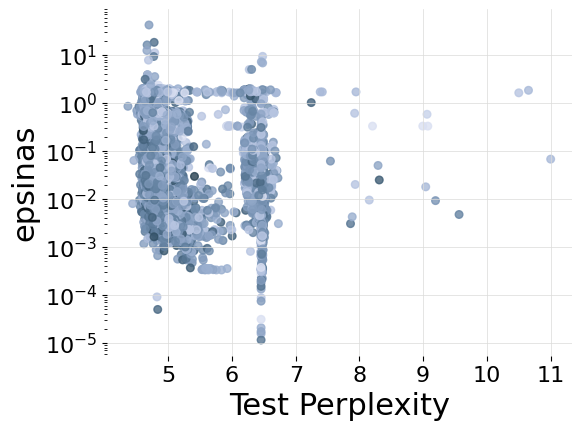

In [5]:
# For better visibility (there is one outlier in accuracies)
scores_plot = np.array(scores)[(np.array(scores)>0.00001) & (np.array(accs)<np.nanmax(accs))]
accs_plot = np.array(accs)[(np.array(scores)>0.00001) & (np.array(accs)<np.nanmax(accs))]
nparams_plot = np.array(nparams)[(np.array(scores)>0.00001) & (np.array(accs)<np.nanmax(accs))]

# Overall
plot_results(scores=scores_plot,
             accs=accs_plot,
             nparams=nparams_plot,
             top10=False,
             log_scale=True,
             save_dir=save_dir_single,
             save_name="_epsinas")

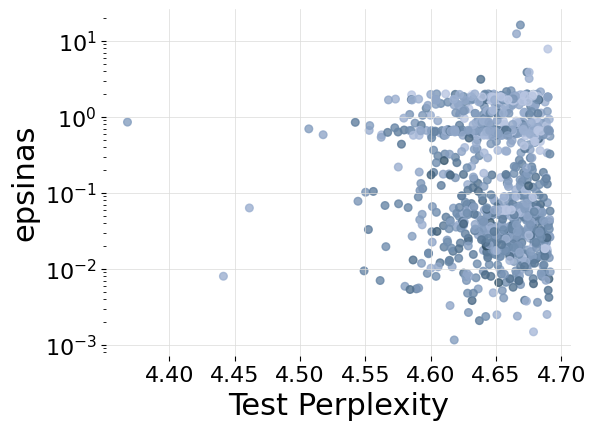

In [6]:
# Top-10% perplexity networks
plot_results(scores=scores,
             accs=accs,
             nparams=nparams,
             top10=True,
             log_scale=True,
             save_dir=save_dir_single,
             save_name='_epsinas_top10')

### Multiple runs

4114 architectures are trained with 3 different seeds. For each of them we 
evaluate epsilon once and collect the test error information to report the
mean and min-max range.

In [16]:
# Load precomputed results
save_dir_multi = '../epsinas-release-data/NAS-Bench-NLP/evaluation/three_seeds'
datafile = open(f'{save_dir_multi}/data_NAS-Bench-NLP_three_n06032025','rb')

data = pkl.load(datafile)

scores = data["scores"]
accs_mean = data["accs_mean"]
accs_min = data["accs_min"]
accs_max = data["accs_max"]
nparams = data["nparams"]

datafile.close()

In [20]:
# Make the table
headers = ["Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
table = PrettyTable(headers)
stats, _ = compute_stats(scores, accs_mean, maximize=False)
table.add_row(stats)

In [21]:
table

Spearman (global),Spearman (top-10%),Kendall (global),Kendall (top-10%),Top-10%/top-10%,Top-64/top-5%
-0.36,-0.16,-0.25,-0.11,25.93,17.00


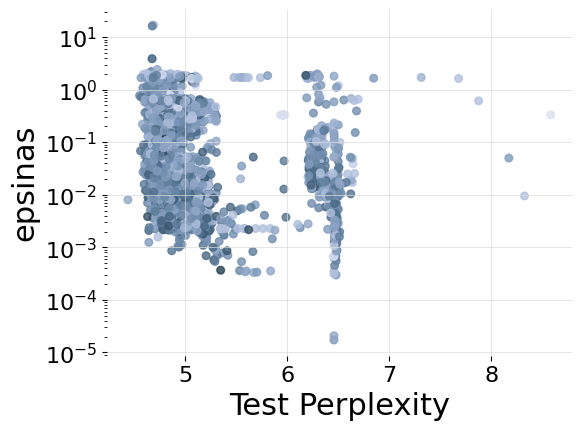

In [26]:
# For better visibility (there is one outlier in accuracies)
inds = (np.array(scores)>0.00001) & (np.array(accs_mean)<np.nanmax(accs_mean))
scores_plot = np.array(scores)[inds]
accs_mean_plot = np.array(accs_mean)[inds]
accs_min_plot = np.array(accs_min)[inds]
accs_max_plot = np.array(accs_max)[inds]
nparams_plot = np.array(nparams)[inds]

# Top-10% perplexity networks
plot_results(scores=scores_plot,
             accs=accs_mean_plot,
             accs_min=accs_min_plot,
             accs_max=accs_max_plot,
             nparams=nparams_plot,
             log_scale=True,
             top10=False,
             save_dir=save_dir_multi,
             save_name='_epsinas')

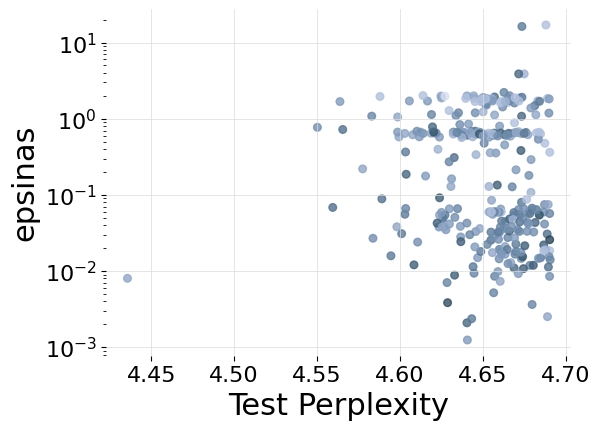

In [27]:
# Top-10% perplexity networks
plot_results(scores=scores,
             accs=accs_mean,
             accs_min=accs_min,
             accs_max=accs_max,
             nparams=nparams,
             log_scale=True,
             top10=True,
             save_dir=save_dir_multi,
             save_name='_epsinas')